In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ragdoc/RAG.docx
/kaggle/input/clean-bankok-traffy-csv/cleaned_data.csv
/kaggle/input/eval-mrr/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/clean-bankok-traffy-csv/cleaned_data.csv')

In [3]:
df.head()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,resolution_time
0,2022-7ZTKJV,"{ถนน,ทางเท้า}",เขต,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อง...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53764,13.70716",แยกจันทน์-นราธิวาส ถนน จันทน์ แขวง ทุ่งมหาเมฆ ...,ทุ่งมหาเมฆ,สาทร,กรุงเทพมหานคร,2022-01-02 10:53:25.580723+00:00,เสร็จสิ้น,3.932253,0,2022-06-08 05:46:12.776594+00:00,3762.879777
1,2022-E24G76,{},เขต,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.52674,13.70950",184 ซอย จันทน์ 18/7 แขวง ทุ่งวัดดอน เขต สาทร ก...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,2022-01-14 01:17:23.873811+00:00,เสร็จสิ้น,3.932253,0,2022-06-22 08:06:08.170048+00:00,3822.812305
2,2022-C37YCA,{},เขต,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52678,13.70967",184 ซอย จันทน์ 18/7 แขวง ทุ่งวัดดอน เขต สาทร ก...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,2022-01-14 01:18:57.194155+00:00,เสร็จสิ้น,3.932253,0,2022-06-22 08:10:20.715755+00:00,3822.856534
3,2022-8EW3HK,{},เขต,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.65816,13.68814",444 ซอย หมู่บ้านเสรี แขวง หนองบอน เขต ประเวศ ก...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2022-01-15 12:52:39.805944+00:00,เสร็จสิ้น,3.932253,0,2022-06-20 07:12:17.332913+00:00,3738.327091
4,2022-98YDNN,{},เขต,ปากซอย จันทน์ 184 จักรยานยนต์นิยมขึ้นมาจอดบนทา...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.52789,13.70611",3 ซอย จันทน์ 18/4 แขวง ทุ่งวัดดอน เขต สาทร กรุ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,2022-01-16 11:02:48.949248+00:00,เสร็จสิ้น,3.932253,0,2022-06-09 03:49:13.904316+00:00,3448.773599


In [4]:
df.tail()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,resolution_time
675310,2025-9MDMC4,{ผิดกฎจราจร},เขต,วันที่ 18 เมย 2568 ยังคงมี รถตุ๊กตุ๊ก จอด ซึ่ง...,NaN,NaN,"100.52773, 13.76707",ป้ายรถประจำทาง โรงพยาบาลรามา 1 แขวงทุ่งพญาไท เ...,ทุ่งพญาไท,ราชเทวี,กรุงเทพมหานคร,2025-04-18 09:17:05,ส่งต่อ(ใหม่),4.270893,0,2025-04-18 09:34:12,0.285278
675311,2025-V6JH9K,{ต้นไม้},เขต,ต้นไม้ยื่นกิ่งก้านยาวเข้าบ้าน,NaN,NaN,"100.48312, 13.71854",132 ถ. ราชพฤกษ์ แขวงบุคคโล เขตธนบุรี กรุงเทพมห...,บุคคโล,ธนบุรี,กรุงเทพมหานคร,2025-04-18 09:16:27,เสร็จสิ้น,5.000000,0,2025-04-18 22:29:51,13.223333
675312,2025-U2NYVN,{ผิดกฎจราจร},เขต,จุดนี้มีรถกระบะสีกรม ทะเบียน ณต3127 จอดขวางเส้...,NaN,NaN,"100.59882, 13.88766",54 ซอย พหลโยธิน 63 แยก 2 แขวงอนุสาวรีย์ เขตบาง...,อนุสาวรีย์,บางเขน,จังหวัดกรุงเทพมหานคร,2025-04-18 09:15:04,เสร็จสิ้น,5.000000,0,2025-04-19 16:16:25,31.022500
675313,88V7MX,{สัตว์},เขต,ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...,NaN,NaN,"100.6605, 13.89515",สำนักงานเขตสายไหม ถนนสุขาภิบาล ๕ แขวงออเงิน เข...,ออเงิน,สายไหม,จังหวัดกรุงเทพมหานคร,2025-04-18 09:13:41,เสร็จสิ้น,4.270893,0,2025-04-23 22:15:21,133.027778
675314,2025-K9PNFH,{เสียง},เขต,ข้าพเจ้าขอเรียนแจ้งว่า มีการต่อเติมและก่อสร้าง...,NaN,NaN,"100.52153, 13.74182",150/13 ซอย จรัญเมือง แขวงรองเมือง เขตปทุมวัน ก...,รองเมือง,ปทุมวัน,จังหวัดกรุงเทพมหานคร,2025-04-18 09:08:56,เสร็จสิ้น,4.270893,0,2025-04-22 12:35:49,99.448056


In [5]:
def parse_type_field(x):
    if pd.isna(x) or x == '{}' or x.strip() == '':
        return []
    x = x.strip('{}')  # remove curly braces
    return [item.strip() for item in x.split(',') if item.strip()]

df['type'] = df['type'].apply(parse_type_field)

df_exploded = df.explode('type')

In [6]:
# Stats for each type
type_stats = df_exploded.groupby('type').agg(
    num_tickets=('ticket_id', 'count'),
    avg_star=('star', 'mean'),
    avg_resolution_time=('resolution_time', 'mean'),
    resolved_count=('state', lambda x: (x == 'เสร็จสิ้น').sum()),
    total_count=('state', 'count')
).reset_index()

# Stats for each organization
org_stats = df.groupby('organization').agg(
    num_tickets=('ticket_id', 'count'),
    avg_star=('star', 'mean'),
    avg_resolution_time=('resolution_time', 'mean'),
    resolved_count=('state', lambda x: (x == 'เสร็จสิ้น').sum()),
    total_count=('state', 'count')
)

# Stats for each district
district_stats = df.groupby('district').agg(
    num_tickets=('ticket_id', 'count'),
    avg_star=('star', 'mean'),
    avg_resolution_time=('resolution_time', 'mean'),
    resolved_count=('state', lambda x: (x == 'เสร็จสิ้น').sum()),
    total_count=('state', 'count')
)

type_stats['resolution_rate'] = (type_stats['resolved_count'] / type_stats['total_count']) * 100
type_stats = type_stats.reset_index()

org_stats['resolution_rate'] = (org_stats['resolved_count'] / org_stats['total_count']) * 100
org_stats = org_stats.reset_index()

district_stats['resolution_rate'] = (district_stats['resolved_count'] / district_stats['total_count']) * 100
district_stats = district_stats.reset_index()

In [7]:
type_stats

,index,type,num_tickets,avg_star,avg_resolution_time,resolved_count,total_count,resolution_rate
0,0,PM2.5,6943,3.813775,461.768598,6142,6943,88.463200
1,1,การเดินทาง,1957,3.935408,633.908931,1245,1957,63.617782
2,2,กีดขวาง,60248,3.838214,419.695154,51449,60248,85.395366
3,3,ขอความช่วยเหลือ,79,4.167767,34.532781,40,79,50.632911
4,4,ขอใช้บริการ,46,4.269515,45.434366,30,46,65.217391
5,5,ขึ้นทะเบียน&สำรวจ,23,4.196592,46.480459,20,23,86.956522
6,6,คนจรจัด,7011,3.965852,307.118794,6070,7011,86.578234
7,7,คนเร่ร่อน,271,4.256654,34.568181,149,271,54.981550
8,8,คลอง,22388,3.957662,563.381638,19346,22388,86.412364
9,9,ควันดำ,49,4.042992,26.659422,19,49,38.775510


In [8]:
org_stats

,organization,num_tickets,avg_star,avg_resolution_time,resolved_count,total_count,resolution_rate
0,กลุ่มงานสัญญาณไฟจราจร,103,3.964983,686.565580,68,103,66.019417
1,กสทช.,1,3.932253,32.592239,0,1,0.000000
2,กองบัญชาการตำรวจนครบาล,141,3.851221,1197.556134,97,141,68.794326
3,การประปานครหลวง,11,3.490025,567.898531,7,11,63.636364
4,การไฟฟ้านครหลวง,1,3.932253,67.564664,1,1,100.000000
5,ขสมก.,2,3.932253,197.050920,0,2,0.000000
6,สำนักการจราจรและขนส่ง,91,3.856253,530.521294,51,91,56.043956
7,สำนักการระบายน้ำ,47,4.014822,719.481201,35,47,74.468085
8,สำนักการโยธา,49,3.946079,896.954585,22,49,44.897959
9,สำนักงานก่อสร้างและบูรณะ,37616,4.003220,1203.061221,25378,37616,67.465972


In [9]:
district_stats

,district,num_tickets,avg_star,avg_resolution_time,resolved_count,total_count,resolution_rate
0,คลองสาน,7529,3.944262,589.823753,6581,7529,87.408686
1,คลองสามวา,13269,3.952611,638.914510,11494,13269,86.622956
2,คลองเตย,22809,3.879006,489.323974,17799,22809,78.034986
3,คันนายาว,7802,4.004064,431.711308,6211,7802,79.607793
4,จตุจักร,32465,3.973391,646.938961,25568,32465,78.755583
5,จอมทอง,10326,3.978397,459.355049,8127,10326,78.704242
6,ดอนเมือง,10370,3.873926,508.558344,8383,10370,80.838959
7,ดินแดง,16221,3.896336,617.584772,12528,16221,77.233216
8,ดุสิต,7998,4.026982,499.226156,6519,7998,81.507877
9,ตลิ่งชัน,11711,3.952750,468.356976,8982,11711,76.697122


In [10]:
type_stats.to_csv('type_stats.csv', index=False)
org_stats.to_csv('org_stats.csv', index=False)
district_stats.to_csv('district_stats.csv', index=False)

In [11]:
!pip install -qU langchain
!pip install -qU langchain-google-genai
!pip install -qU langchain-huggingface
!pip install -qU langchain-qdrant
!pip install -qU langchain-community
!pip install -qU langgraph
!pip install fastembed
!pip install docx2txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [12]:
import os
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
os.environ["GOOGLE_API_KEY"] = user_secrets.get_secret("Gemini API key")
os.environ["LANGSMITH_API_KEY"] = user_secrets.get_secret('langsmith_api_key')
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [13]:
# from huggingface_hub import notebook_login

# notebook_login()

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")

In [15]:
from langchain_huggingface import HuggingFaceEmbeddings

model_kwargs = {'trust_remote_code': True}
embeddings = HuggingFaceEmbeddings(model_name="Alibaba-NLP/gte-modernbert-base",model_kwargs=model_kwargs)

2025-05-08 10:51:53.129074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746701513.346223      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746701513.403490      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [16]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

model = HuggingFaceCrossEncoder(model_name="Alibaba-NLP/gte-reranker-modernbert-base")

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/598M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

In [17]:
from langchain_community.document_loaders import Docx2txtLoader

file_path = (
    "/kaggle/input/ragdoc/RAG.docx"
)
loader = Docx2txtLoader(file_path)
pages = loader.load()

In [18]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  
    chunk_overlap=200, 
    separators=["#", "\n\n", "\n", " ", ""],
    add_start_index=True, 
)
all_splits = text_splitter.split_documents(pages)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 9 sub-documents.


In [19]:
for i, split in enumerate(all_splits):
    print(f"--- Split {i+1} ---")
    print(split.page_content)
    print()

--- Split 1 ---
#สำนักงานตำรวจแห่งชาติ

รักษาความปลอดภัยของพระมหากษัตริย์ พระราชินี พระรัชทายาท และพระบรมวงศานุวงศ์

ดูแล ควบคุม และกำกับการปฏิบัติงานของข้าราชการตำรวจตามประมวลกฎหมายวิธีพิจารณาความอาญา

ป้องกันและปราบปรามการกระทำความผิดอาญา

รักษาความสงบเรียบร้อย ความปลอดภัยของประชาชน และความมั่นคงของราชอาณาจักร

ปฏิบัติการอื่น ๆ ตามที่กฎหมายกำหนด

ช่วยเหลือการพัฒนาประเทศ

ส่งเสริมและสนับสนุนให้การปฏิบัติหน้าที่ของตำรวจเป็นไปอย่างมีประสิทธิภาพ



#กองบัญชาการตำรวจนครบาล

ดูแลรักษาความปลอดภัยในเขตกรุงเทพมหานคร

มีกองบังคับการทั้งหมด 15 กองบังคับการ และ 1 กองกำกับการที่ขึ้นตรงผู้บัญชาการ

--- Split 2 ---
#กองบัญชาการตำรวจนครบาล

ดูแลรักษาความปลอดภัยในเขตกรุงเทพมหานคร

มีกองบังคับการทั้งหมด 15 กองบังคับการ และ 1 กองกำกับการที่ขึ้นตรงผู้บัญชาการ



#สำนักการโยธา

วางแผนการโยธาและพัฒนาระบบข้อมูลสารสนเทศที่เกี่ยวกับงานโยธา

ตรวจสอบ วิเคราะห์ และควบคุมคุณภาพของวัสดุที่ใช้ในการก่อสร้าง

ก่อสร้าง บูรณะ และบำรุงรักษาทาง ติดตั้ง ตรวจสอบ และควบคุมไฟฟ้าสาธารณะ

วางแผน ออกแบบ และประมาณราคาค่าก่อสร้า

## Hybrid Search

In [20]:
from langchain_qdrant import FastEmbedSparse, QdrantVectorStore, RetrievalMode
from qdrant_client import QdrantClient, models
from qdrant_client.http.models import Distance, SparseVectorParams, VectorParams

sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")

client = QdrantClient(path="/tmp/langchain_qdrant_5")

client.create_collection(
    collection_name="my_documents",
    vectors_config={"dense": VectorParams(size=768, distance=Distance.COSINE)},
    sparse_vectors_config={
        "sparse": SparseVectorParams(index=models.SparseIndexParams(on_disk=False))
    },
)

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

bengali.txt:   0%|          | 0.00/5.44k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

basque.txt:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

catalan.txt:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

azerbaijani.txt:   0%|          | 0.00/967 [00:00<?, ?B/s]

arabic.txt:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

finnish.txt:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

chinese.txt:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

hinglish.txt:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

hungarian.txt:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

hebrew.txt:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

indonesian.txt:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

german.txt:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

greek.txt:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

kazakh.txt:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

portuguese.txt:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

romanian.txt:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

russian.txt:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

spanish.txt:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

slovene.txt:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

nepali.txt:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

italian.txt:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

tajik.txt:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

True

In [21]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [22]:
# retriever
qdrant = QdrantVectorStore(
    client=client,
    collection_name="my_documents",
    embedding=embeddings,
    sparse_embedding=sparse_embeddings,
    retrieval_mode=RetrievalMode.HYBRID,
    vector_name="dense",
    sparse_vector_name="sparse",
)

qdrant.add_documents(documents=all_splits)

W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125] WON'T CONVERT compiled_embeddings /usr/local/lib/python3.11/dist-packages/transformers/models/modernbert/modeling_modernbert.py line 212 
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125] due to: 
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125] Traceback (most recent call last):
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125]   File "/usr/local/lib/python3.11/dist-packages/torch/_dynamo/output_graph.py", line 1446, in _call_user_compiler
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125]     compiled_fn = compiler_fn(gm, self.example_inputs())
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125]                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
W0508 10:52:33.516000 19 torch/_dynamo/convert_frame.py:1125]   File "/usr/local/lib/python3.11/dist-packages/torch/_dynamo/repro/after_dynamo.py", line 129, in __call__
W0508 10:52:33.516000 19 torch/_dynamo/convert_f

['96707fb2240942298341b07477823aab',
 '28b06e04c99a4936b89ac2bc93dac072',
 '0e9c0381816b449b8ff347ba98370f7f',
 '80b5f86e256242d6ab8cc60aeaefd69e',
 '40dce1fb683f4b98b62ff09cdcdd26ea',
 '51eb3d310520426e8fad49aae9fc157c',
 '2226bade53584aee90c647742ca917ff',
 'b744e61d48fb46c09102fa250d71edd4',
 '1fe71285ac3e419ab4b2df4595cb38fb']

## Reranking

In [23]:
retriever = qdrant.as_retriever(search_kwargs={"k": 20})

In [24]:
from langchain.retrievers import ContextualCompressionRetriever

reranker = CrossEncoderReranker(
    model = model,
    top_n = 3
)

retriever_reranked = ContextualCompressionRetriever(
    base_retriever=retriever,
    base_compressor=reranker
)

## Retrieval Evaluation

In [25]:
# Load your test dataset
test_data = pd.read_csv("/kaggle/input/eval-mrr/test.csv", sep=",")

In [26]:
from tqdm import tqdm
rerank_mrr = 0
rerank_failures = 0
limit = -1
count = 0
top_k = 3

for index, row in tqdm(test_data.iterrows(), total=len(test_data)):
    query = row["context"]
    # The target is now the organization name
    # relevant_org_name = row["target"] # Not directly used in this version

    reranked_results = retriever_reranked.invoke(query)
    target_org_name = row["target"]
    # debug
    # print(f"\n--- Query {count}: '{query}' (Expected to contain: '{target_org_name}') ---")

    # print("Top Reranked Results:")
    # for i, doc in enumerate(reranked_results[:top_k]):
    #     print(f"  Rank {i+1}: Content='{doc.page_content[:50]}...', Metadata='{doc.metadata}'")

    found_relevant = False
    for i in range(min(top_k, len(reranked_results))):
        if target_org_name in reranked_results[i].page_content:
            rerank_mrr += 1 / (i + 1)
            found_relevant = True
            break

    if not found_relevant:
        print(f"Query {count}: Failed to find relevant doc (containing '{target_org_name}') in top {top_k} results for context '{query}'")
        rerank_failures += 1

    count += 1
    if limit != -1 and count == limit:
        break

if count > 0:
    mrr = rerank_mrr / count
    failure_rate = rerank_failures / count
    print(f"\nMean Reciprocal Rank (MRR)@{top_k}: {mrr:.4f}")
    print(f"Failure Rate (no relevant doc in top {top_k}): {failure_rate:.4f}")
else:
    print("No data processed.")

  0%|          | 0/30 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:00<00:18,  1.59it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  7%|▋         | 2/30 [00:01<00:16,  1.72it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 10%|█         | 3/30 [00:01<00:15,  1.76it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 13%|█▎        | 4/30 [00:02<00:14,  1.80it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 17%|█▋        | 5/30 [00:02<00:13,  1.81it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 20%|██        | 6/30 [00:03<00:13,  1.83it/s]

Query 5: Failed to find relevant doc (containing 'สำนักการโยธา') in top 3 results for context 'ควบคุมคุณภาพวัสดุก่อสร้าง'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 23%|██▎       | 7/30 [00:03<00:12,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 27%|██▋       | 8/30 [00:04<00:12,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 30%|███       | 9/30 [00:04<00:11,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 33%|███▎      | 10/30 [00:05<00:10,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 37%|███▋      | 11/30 [00:06<00:10,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 40%|████      | 12/30 [00:06<00:09,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 43%|████▎     | 13/30 [00:07<00:09,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 47%|████▋     | 14/30 [00:07<00:08,  1.84it/s]

Query 13: Failed to find relevant doc (containing 'สำนักสิ่งแวดล้อม') in top 3 results for context 'คุณภาพอากาศและเสียง'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 15/30 [00:08<00:08,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 53%|█████▎    | 16/30 [00:08<00:07,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 57%|█████▋    | 17/30 [00:09<00:07,  1.82it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 60%|██████    | 18/30 [00:09<00:06,  1.82it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 63%|██████▎   | 19/30 [00:10<00:06,  1.82it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 67%|██████▋   | 20/30 [00:10<00:05,  1.82it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 70%|███████   | 21/30 [00:11<00:04,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 73%|███████▎  | 22/30 [00:12<00:04,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 77%|███████▋  | 23/30 [00:12<00:03,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 80%|████████  | 24/30 [00:13<00:03,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 83%|████████▎ | 25/30 [00:13<00:02,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 87%|████████▋ | 26/30 [00:14<00:02,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 90%|█████████ | 27/30 [00:14<00:01,  1.83it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 93%|█████████▎| 28/30 [00:15<00:01,  1.85it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 97%|█████████▋| 29/30 [00:15<00:00,  1.84it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:16<00:00,  1.83it/s]


Mean Reciprocal Rank (MRR)@3: 0.8611
Failure Rate (no relevant doc in top 3): 0.0667


## Agentic RAG

In [27]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

In [28]:
from langchain_core.tools import tool

@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Return organizational scopes for a named organization in this list ['กลุ่มงานสัญญาณไฟจราจร','กสทช.','กองบัญชาการตำรวจนครบาล',
    'การประปานครหลวง','การไฟฟ้านครหลวง','ขสมก.','สำนักการจราจรและขนส่ง','สำนักการระบายน้ำ','สำนักการโยธา','สำนักงานก่อสร้างและบูรณะ','สำนักสิ่งแวดล้อม','เขต']."""
    retrieved_docs = retriever_reranked.get_relevant_documents(query)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

@tool(response_format="content_and_artifact")
def get_type_stat(type_name: str = None):
    """Return statistical data for all types or a specific type if the name is provided."""
    if type_name:
        specific_stats = type_stats[type_stats['type'] == type_name] # Assuming 'type' is the column name
        return specific_stats.to_string(index=False), None
    else:
        return type_stats.to_string(index=False), None

@tool(response_format="content_and_artifact")
def get_org_stat(org_name: str = None):
    """Return statistical data for all organizations or a specific organization if the name is provided."""
    if org_name:
        specific_stats = org_stats[org_stats['organization'] == org_name] # Assuming 'organization' is the column name
        return specific_stats.to_string(index=False), None
    else:
        return org_stats.to_string(index=False), None

@tool(response_format="content_and_artifact")
def get_district_stat(district_name: str = None):
    """Return statistical data for all districts or a specific district if the name is provided."""
    if district_name:
        # Logic to filter district_stats for the specific district_name
        specific_stats = district_stats[district_stats['district'] == district_name]
        return specific_stats.to_string(index=False), None
    else:
        return district_stats.to_string(index=False), None

In [29]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, ToolMessage
from langgraph.prebuilt import ToolNode
from typing import List, Dict, Any

# --- Define message state ---
MessagesState = Dict[str, List[Any]]  # {"messages": [...]}

# --- Step 1: Add a reasoning step ---
def reason_about_query(state: MessagesState) -> MessagesState:
    """Analyze user query and decide what tools or steps are needed."""
    user_message = state["messages"][-1]  # latest human message
    reasoning_prompt = [
        SystemMessage(
            "You are a reasoning assistant. Your job is to analyze the user's question step by step, "
            "think through the potential information needed, and explicitly state your reasoning. "
            "Conclude your thought process by clearly stating the next step, including which tool to use "
            "or what information to retrieve. Structure your response as a chain of thought."
            "you have 4 tools 1. retrieve(query: str): Return organizational scopes for a named organization"
            "2. get_type_stat(): Return statistical data for all types (also can use for specific)."
            "3. get_org_stat(): Return statistical data for all organizes (also can use for specific)."
            "4. get_district_stat(): Return statistical data for all districts (also can use for specific)."
        ),
        user_message
    ]
    reasoning_response = llm.invoke(reasoning_prompt).content
    return {"messages": state["messages"] + [SystemMessage(content=reasoning_response)]}

# --- Step 2: Query or Respond (calls tools if needed) ---
def query_or_respond(state: MessagesState) -> MessagesState:
    """Generate tool call for retrieval or respond directly."""
    llm_with_tools = llm.bind_tools([
        retrieve, get_type_stat, get_org_stat, get_district_stat
    ])
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": state["messages"] + [response]}

# --- Step 3: Use ToolNode to run tools ---
tools = ToolNode([
    retrieve,
    get_type_stat,
    get_org_stat,
    get_district_stat
])

# --- Step 4: Generate final answer using tool output ---
def generate(state: MessagesState) -> MessagesState:
    """Generate answer based on retrieved content or tool output."""
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if isinstance(message, ToolMessage):
            recent_tool_messages.append(message)
        elif isinstance(message, (HumanMessage, AIMessage)):
            break

    tool_messages = recent_tool_messages[::-1]  # maintain order

    docs_content = "\n\n".join(
        msg.content for msg in tool_messages if hasattr(msg, "content")
    )

    system_message_content = (
        "You are an intelligent assistant. Use step-by-step reasoning when necessary. "
        "You have access to context and statistics below. Answer concisely. "
        "If unsure, say 'I don't know.'\n\n"
        "Context:\n"
        f"{docs_content}"
    )

    conversation_messages = [
        m for m in state["messages"]
        if isinstance(m, (HumanMessage, SystemMessage, AIMessage)) and not getattr(m, "tool_calls", False)
    ]

    full_prompt = [SystemMessage(system_message_content)] + conversation_messages
    response = llm.invoke(full_prompt)
    return {"messages": state["messages"] + [response]}

In [30]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder.add_node("reason_about_query", reason_about_query)
graph_builder.add_node("query_or_respond", query_or_respond)
graph_builder.add_node("tools", tools)
graph_builder.add_node("generate", generate)

graph_builder.set_entry_point("reason_about_query")
graph_builder.add_edge("reason_about_query", "query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

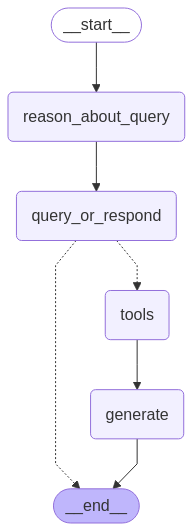

In [31]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [33]:
input_message = "get me stats by org"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

get me stats by org
================================ System Message ================================

Okay, I need to get the statistics for organizations. Since the user did not specify a particular organization, I should retrieve statistics for all organizations.

Therefore, my next step is to use the `get_org_stat()` tool without any specific organization name.

```tool_code
get_org_stat()
```
================================== Ai Message ==================================
Tool Calls:
  get_org_stat (2a934674-27db-4c7c-a118-3bc024e32194)
 Call ID: 2a934674-27db-4c7c-a118-3bc024e32194
  Args:
================================= Tool Message =================================
Name: get_org_stat

            organization  num_tickets  avg_star  avg_resolution_time  resolved_count  total_count  resolution_rate
   กลุ่มงานสัญญาณไฟจราจร          103  3.964983           686.565580              68          103   

In [34]:
input_message = "get me stats by types"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

get me stats by types
================================ System Message ================================

Okay, I understand the request. The user wants statistical data for all types.

Here's my plan:

1.  **Use the `get_type_stat()` tool to retrieve the statistical data for all types.** This tool is designed specifically for this purpose.
2.  **Present the retrieved data to the user.**

Therefore, my next step is to use the `get_type_stat()` tool.

```tool_code
get_type_stat()
```
================================== Ai Message ==================================
Tool Calls:
  get_type_stat (94a043b9-6216-4af4-9714-82b29a979429)
 Call ID: 94a043b9-6216-4af4-9714-82b29a979429
  Args:
================================= Tool Message =================================
Name: get_type_stat

 index                    type  num_tickets  avg_star  avg_resolution_time  resolved_count  total_count  resolution_rate
     0

In [35]:
input_message = "get me stats by districts"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

get me stats by districts
================================ System Message ================================

Okay, I need to get statistics for districts. To do this effectively, I should probably start by getting a general overview of the available district statistics.

**Next Step:** Use the `get_district_stat()` tool to get overall district statistics.
================================== Ai Message ==================================
Tool Calls:
  get_district_stat (dcdb5243-822e-44af-b9cb-1d38018ba8e6)
 Call ID: dcdb5243-822e-44af-b9cb-1d38018ba8e6
  Args:
================================= Tool Message =================================
Name: get_district_stat

         district  num_tickets  avg_star  avg_resolution_time  resolved_count  total_count  resolution_rate
          คลองสาน         7529  3.944262           589.823753            6581         7529        87.408686
        คลองสามวา        13269  

In [36]:
input_message = "เขตที่มีคะแนนความพึงพอใจเฉลี่ยเกิน 4.0 มีทั้งหมดกี่เขต"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

เขตที่มีคะแนนความพึงพอใจเฉลี่ยเกิน 4.0 มีทั้งหมดกี่เขต
================================ System Message ================================

เพื่อตอบคำถามนี้ ฉันต้องทราบคะแนนความพึงพอใจเฉลี่ยของแต่ละเขตก่อน จากนั้นฉันจึงจะสามารถนับจำนวนเขตที่มีคะแนนเฉลี่ยเกิน 4.0 ได้ ดังนั้น ขั้นตอนแรกคือการดึงข้อมูลสถิติของแต่ละเขต

Next step: Use `get_district_stat()` to retrieve the statistical data for all districts.
================================== Ai Message ==================================
Tool Calls:
  get_district_stat (6f47e375-c3be-43a5-bdac-a6bcdb87dd97)
 Call ID: 6f47e375-c3be-43a5-bdac-a6bcdb87dd97
  Args:
================================= Tool Message =================================
Name: get_district_stat

         district  num_tickets  avg_star  avg_resolution_time  resolved_count  total_count  resolution_rate
          คลองสาน         7529  3.944262           589.823753            6581         7529   

In [37]:
input_message = "ขอทราบขอบเขตหน้าที่ของ สำนักสิ่งแวดล้อม"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

ขอทราบขอบเขตหน้าที่ของ สำนักสิ่งแวดล้อม
================================ System Message ================================

Okay, I need to find the scope of responsibilities for the "สำนักสิ่งแวดล้อม" organization. Since I have a tool to retrieve organizational scopes, I should use that first.

**Next Step:** Use the `retrieve` tool to find the scope of responsibilities for "สำนักสิ่งแวดล้อม".
```tool_code
retrieve(query: "สำนักสิ่งแวดล้อม")
```
================================== Ai Message ==================================
Tool Calls:
  retrieve (11586762-1616-4ea5-831b-4045edfe8af6)
 Call ID: 11586762-1616-4ea5-831b-4045edfe8af6
  Args:
    query: สำนักสิ่งแวดล้อม


/tmp/ipykernel_19/3254477853.py:7: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever_reranked.get_relevant_documents(query)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve

Source: {'source': '/kaggle/input/ragdoc/RAG.docx', 'start_index': 3220, '_id': '51eb3d310520426e8fad49aae9fc157c', '_collection_name': 'my_documents'}
Content: #สำนักสิ่งแวดล้อม

บริหารจัดการด้านสิ่งแวดล้อมอย่างยั่งยืน

ศึกษา วิจัย วิเคราะห์ สร้างการมีส่วนร่วมทุกภาคส่วน

เฝ้าระวัง ฟื้นฟู ส่งเสริม พัฒนา และดูแลรักษาคุณภาพสิ่งแวดล้อม

กำหนดยุทธศาสตร์ กลยุทธ์ เป้าหมาย ตัวชี้วัด และแนวทางการขับเคลื่อนเพื่อพัฒนาด้านสิ่งแวดล้อมของกรุงเทพมหานคร

ติดตาม ตรวจสอบคุณภาพสิ่งแวดล้อม จัดทำและพัฒนาระบบข้อมูลสารสนเทศ

บริหารจัดการขยะมูลฝอย ของเสียอันตราย สิ่งปฏิกูลและน้ำเสียของกรุงเทพมหานครทั้งระบบ

ให้บริการสาธารณะด้านการรักษาความสะอาดของกรุงเทพมหานคร

ตรวจสอบ ควบคุม เฝ้าระวัง คุณภาพอากาศและเสียงตามเกณฑ์ที่กำหนด

ศึกษาความเสี่ยง และวิเคราะห์ผลกระทบสิ่งแวดล้อม

กำหนดยุทธศาสตร์การฟื้นและการดูแลบำรุงรักษาพื้นที่สีเขียวของกรุงเทพมหานคร

Source: {'source': '/kaggle/input/ragdoc/RAG.docx', 'start_index': 1210,

In [38]:
!pip install FastAPI pyngrok uvicorn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00


In [39]:
ngrok_token = user_secrets.get_secret("ngrok_token")
from pyngrok import ngrok, conf
conf.get_default().auth_token = ngrok_token

In [40]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# import nest_asyncio
# from pyngrok import ngrok
# import uvicorn

# app = FastAPI()
# nest_asyncio.apply()

# class QueryRequest(BaseModel):
#     query: str

# @app.post("/ask")
# async def ask(request: QueryRequest):
#     input_message = request.query
#     final_response = ""

#     # Stream response and capture the last message
#     for step in graph.stream(
#         {"messages": [{"role": "user", "content": input_message}]},
#         stream_mode="values",
#         config=config,
#     ):
#         # Assuming HumanMessage object has a `content` attribute
#         final_response = step["messages"][-1].content  # Use .content or the appropriate attribute

#     return {"answer": final_response}

# # Open an ngrok tunnel to the uvicorn app
# public_url = ngrok.connect(8000)
# print("FastAPI running at:", public_url)

# # Start the server
# uvicorn.run(app, port=8000)